<a href="https://colab.research.google.com/github/Aminansari/ADS_HW8/blob/main/HW_8_Multiclass_%26_Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AmirHossein Naghdi

# 15 Points on the notebook running correctly.

# 15 Points on having sufficient explanations and overall readability of the notebook

# Dataset


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
csv_url = "https://docs.google.com/spreadsheets/d/1Z8n2tMI9_31b0YiNiI6joR6qNKaMyhnDLOAk5ZJN2yQ/gviz/tq?tqx=out:csv"
df = pd.read_csv(csv_url).iloc[:, 1:]

In [34]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (5000, 9)


In [35]:
df.head(10)

,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Humidity                       5000 non-null   float64
 1   PM2.5                          5000 non-null   float64
 2   PM10                           5000 non-null   float64
 3   NO2                            5000 non-null   float64
 4   SO2                            5000 non-null   float64
 5   CO                             5000 non-null   float64
 6   Proximity_to_Industrial_Areas  5000 non-null   float64
 7   Population_Density             5000 non-null   int64  
 8   Air Quality                    5000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 351.7+ KB


In [37]:
df.nunique()

,0
Humidity,723
PM2.5,815
PM10,955
NO2,445
SO2,348
CO,265
Proximity_to_Industrial_Areas,179
Population_Density,683
Air Quality,4


In [38]:
df.isnull().sum()

,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [39]:
df.describe()

,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [40]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [41]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [42]:
numerical_cols = df.select_dtypes(include=np.number).columns

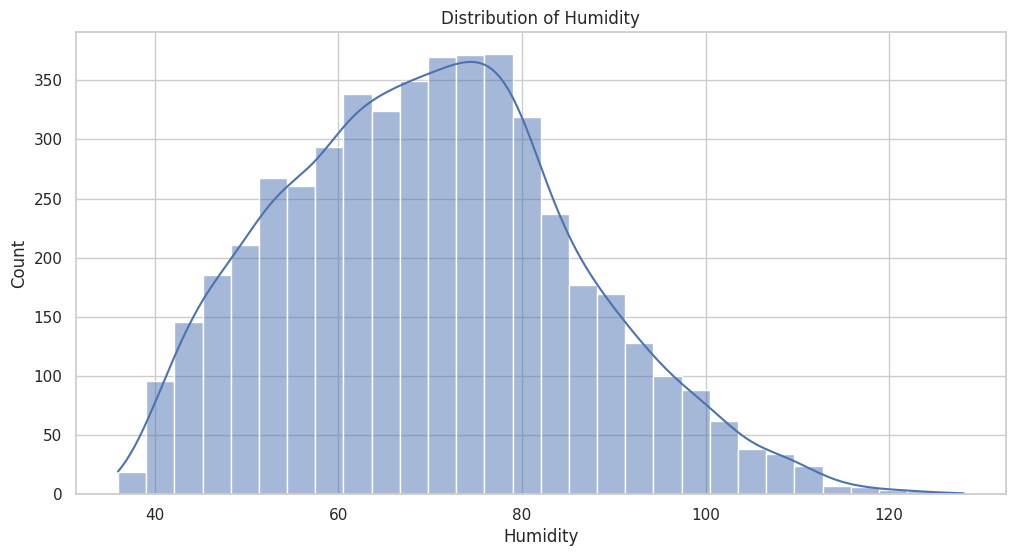

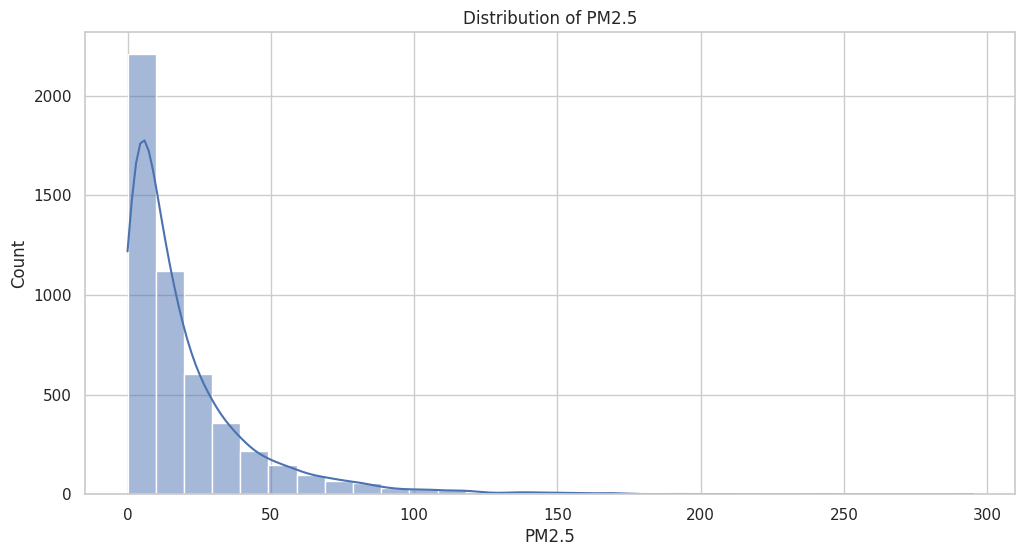

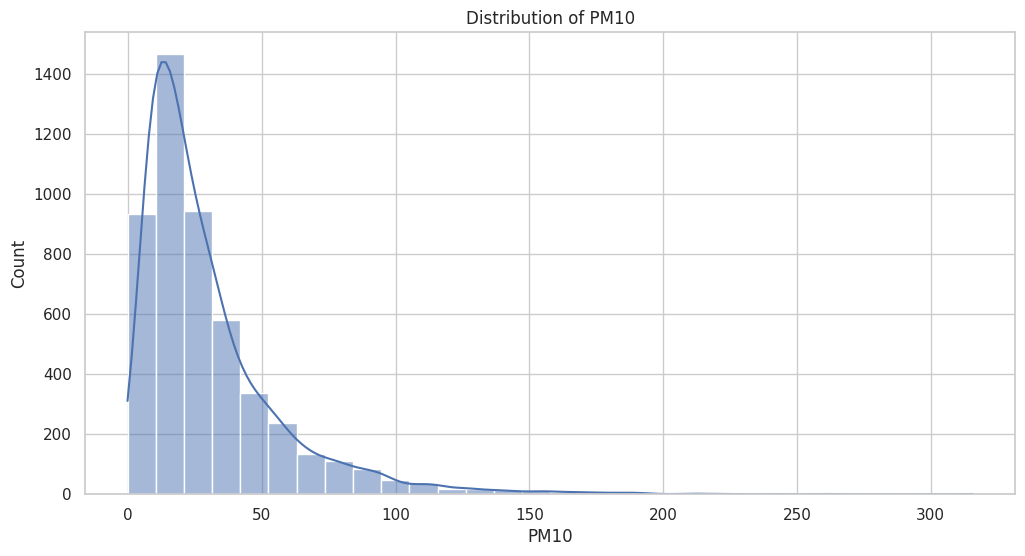

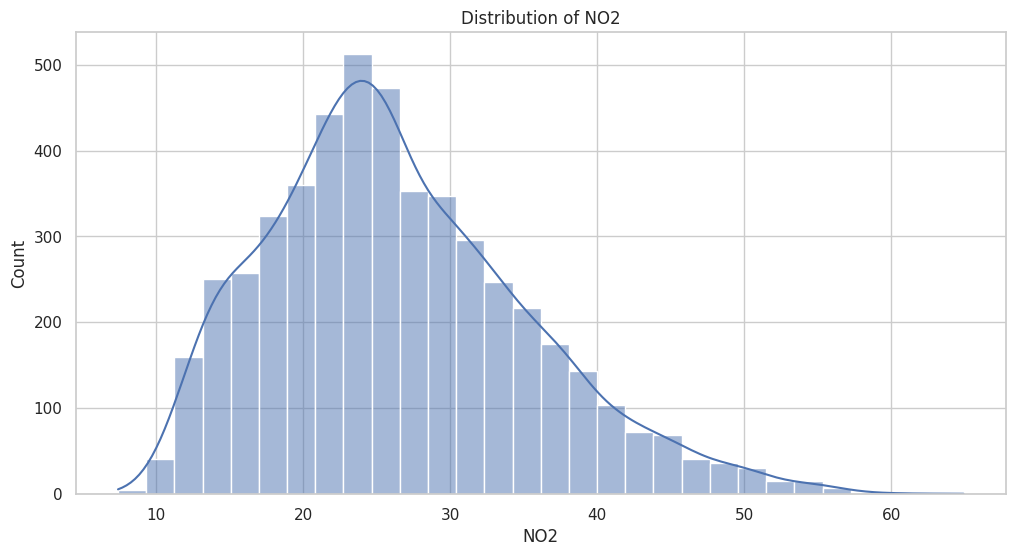

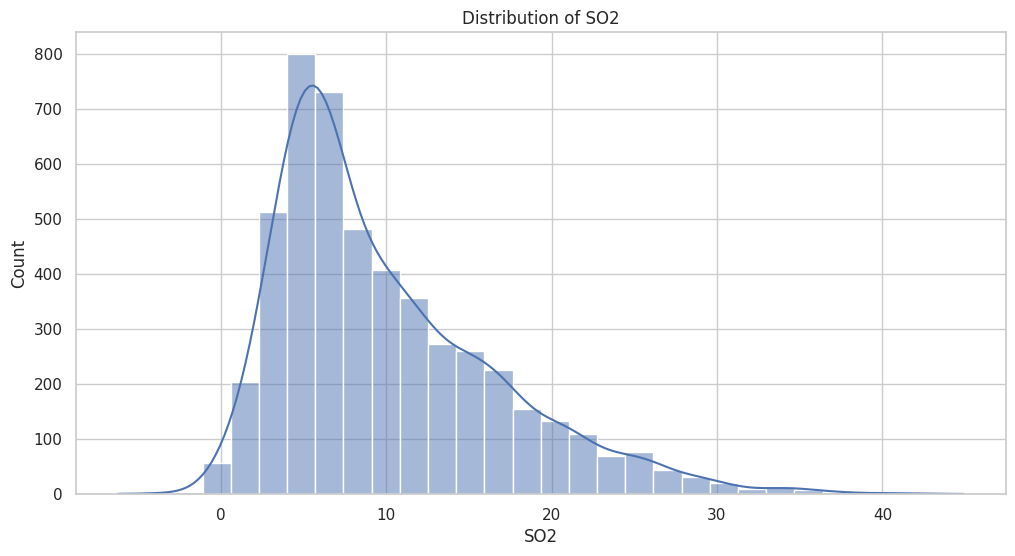

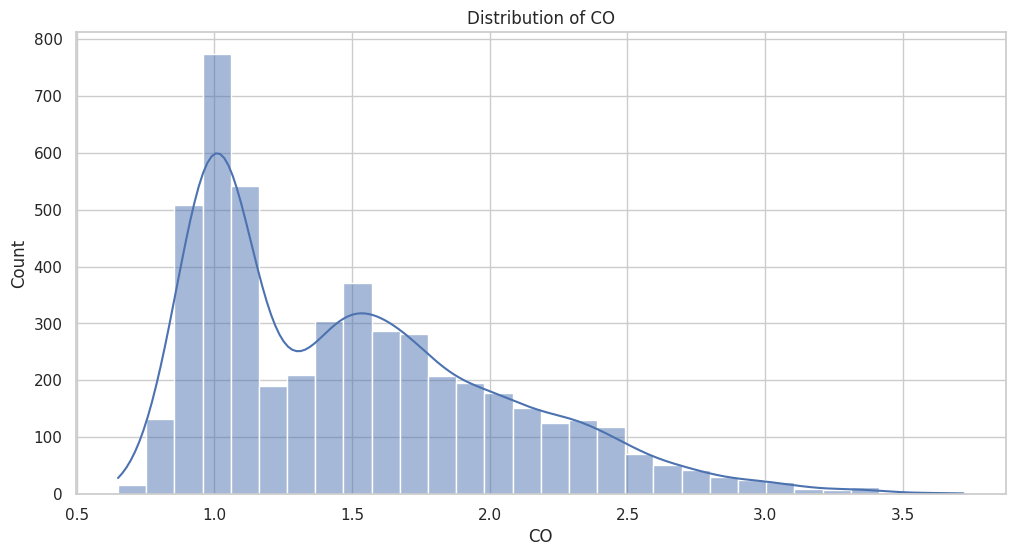

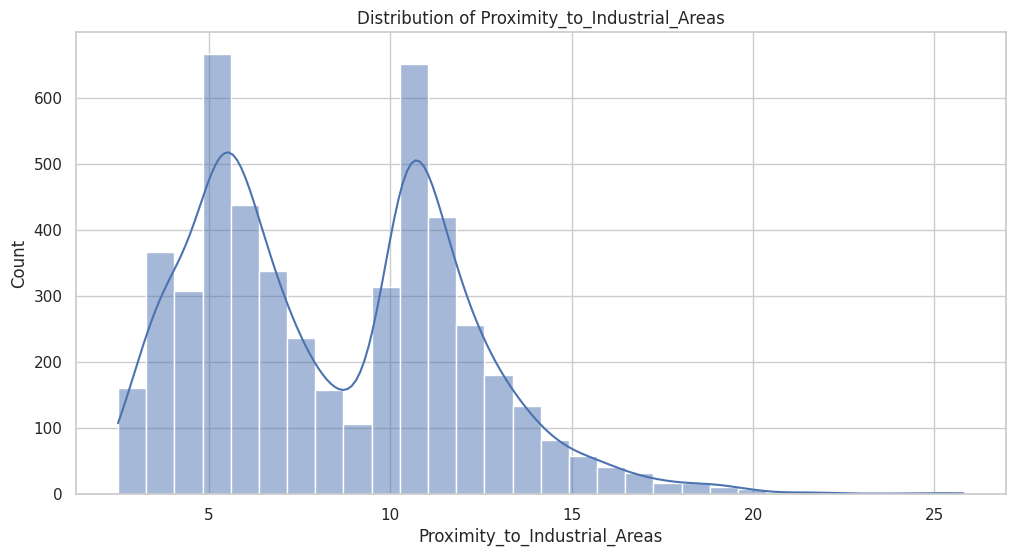

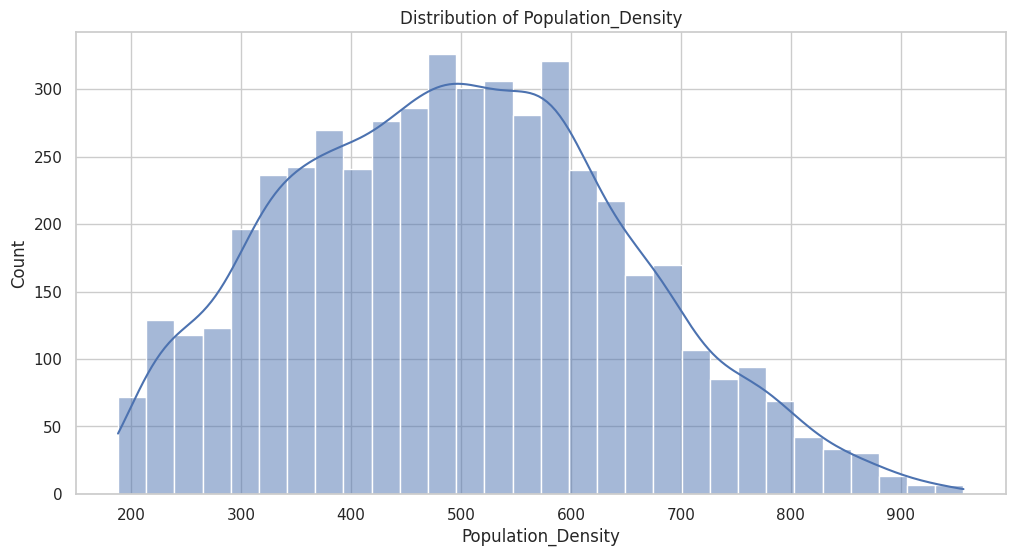

In [43]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [44]:
categorical_cols = df.select_dtypes(include='object').columns

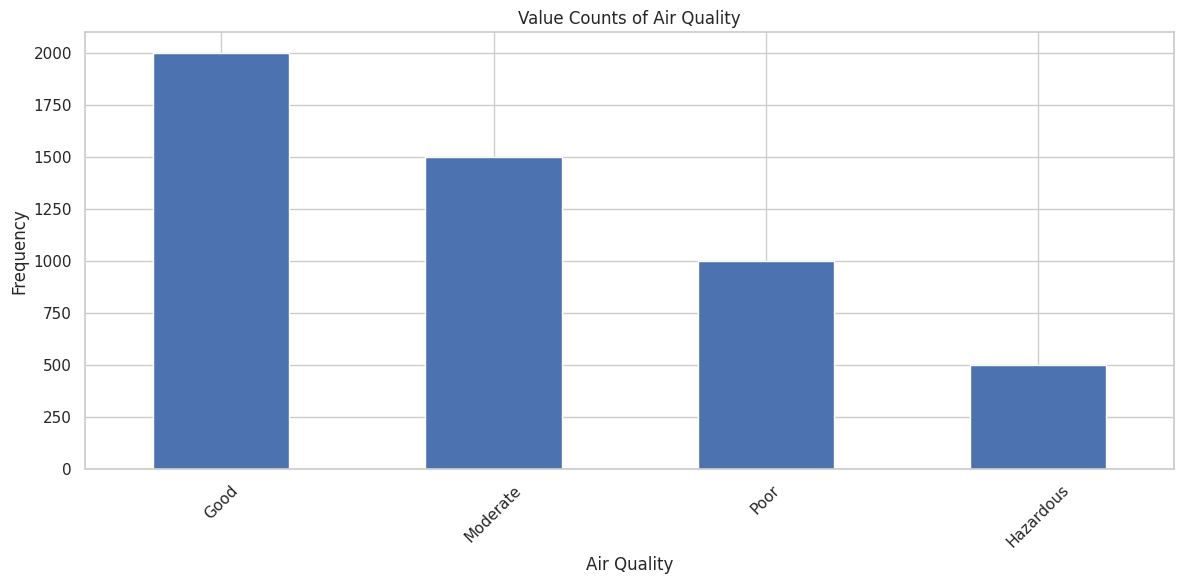

In [45]:
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target_positions = df.pop('Air Quality')
standard_scaling_columns = list(set(df.columns))
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,NO2,CO,PM10,PM2.5,Population_Density,Humidity,SO2,Proximity_to_Industrial_Areas
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.335820e-16,-3.346656e-16,-1.474376e-16,9.379164e-17,-1.875833e-16,4.554579e-16,-7.247536e-17,5.258016e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.137520e+00,-1.557505e+00,-1.112332e+00,-8.203839e-01,-2.025836e+00,-2.147027e+00,-2.402328e+00,-1.641120e+00
25%,-7.096659e-01,-8.614983e-01,-6.552350e-01,-6.330272e-01,-7.622411e-01,-7.411504e-01,-7.281616e-01,-8.379257e-01
50%,-1.250328e-01,-1.654920e-01,-3.114977e-01,-3.316272e-01,-2.241605e-02,-1.614678e-02,-2.985083e-01,-1.455167e-01
75%,6.170016e-01,6.220941e-01,2.882142e-01,2.426620e-01,6.715792e-01,6.458130e-01,5.496866e-01,7.407669e-01
max,4.327173e+00,4.065494e+00,1.044309e+01,1.119489e+01,3.008903e+00,3.659306e+00,5.168459e+00,4.812132e+00


In [47]:
from sklearn.model_selection import train_test_split

y = target_positions
print("Target variable preview:\n", y.head())

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Target variable preview:
 0    Moderate
1    Moderate
2    Moderate
3        Good
4        Good
Name: Air Quality, dtype: object

Training features shape: (4000, 8)
Test features shape: (1000, 8)
Training target shape: (4000,)
Test target shape: (1000,)


# 10 Points: Multiclass SVM (with F1-score above 2.5/number_of_classes)


Training SVC with linear kernel...
Macro F1-score (linear): 0.89

Training SVC with poly kernel...
Macro F1-score (poly): 0.90

Training SVC with rbf kernel...
Macro F1-score (rbf): 0.91

Best performing kernel: rbf with Macro F1-score: 0.91

Plotting confusion matrix for the best model (rbf)...


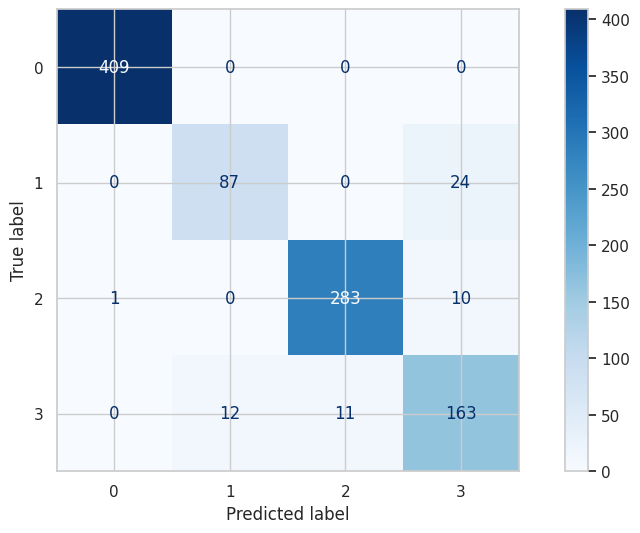

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define SVM kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

# Store results for comparison
results = {}

for kernel in kernels:
    print(f"\nTraining SVC with {kernel} kernel...")

    # Initialize and train the model
    model = SVC(C=2, kernel=kernel, decision_function_shape="ovr", max_iter=5000)
    model.fit(X_train, y_train)

    # Predict on test set
    predictions = model.predict(X_test)

    # Compute macro F1-score
    f1 = f1_score(y_test, predictions, average='macro')
    results[kernel] = f1
    print(f"Macro F1-score ({kernel}): {f1:.2f}")

# Show best performing kernel
best_kernel = max(results, key=results.get)
print(f"\nBest performing kernel: {best_kernel} with Macro F1-score: {results[best_kernel]:.2f}")

# Plot confusion matrix for best kernel
print(f"\nPlotting confusion matrix for the best model ({best_kernel})...")
best_model = SVC(C=2, kernel=best_kernel, decision_function_shape="ovr", max_iter=5000)
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

# 15 Points: Multiclass Logistic Regression (with F1-score above 2.5/number_of_classes)
* 5 Points: using OVR technique
* 5 Points: using multinomial approach
* 5 Points: calculate log loss for the output

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_fscore_support

# Define Logistic Regression configurations
configs = [
    {"description": "OvR (default)", "params": {"max_iter": 400, "multi_class": 'ovr'}},
    {"description": "Multinomial", "params": {"max_iter": 400, "multi_class": 'multinomial', "solver": 'lbfgs'}},
    {"description": "OvR with L2 penalty, C=10", "params": {"penalty": 'l2', "C": 10, "max_iter": 400, "multi_class": 'ovr'}}
]

# Evaluate each configuration
results = {}

for config in configs:
    desc = config["description"]
    params = config["params"]

    print(f"\nTraining Logistic Regression ({desc})...")
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    precision, recall, _, _ = precision_recall_fscore_support(y_test, predictions, average='macro')

    print(f"Macro F1-score: {f1:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

    results[desc] = f1

# Highlight the best performing configuration
best_config = max(results, key=results.get)
print(f"\nBest Logistic Regression config: {best_config} (Macro F1-score: {results[best_config]:.2f})")


Training Logistic Regression (OvR (default))...
Macro F1-score: 0.83
Precision: 0.85, Recall: 0.82

Training Logistic Regression (Multinomial)...
Macro F1-score: 0.90
Precision: 0.91, Recall: 0.89

Training Logistic Regression (OvR with L2 penalty, C=10)...
Macro F1-score: 0.83
Precision: 0.85, Recall: 0.82

Best Logistic Regression config: Multinomial (Macro F1-score: 0.90)


# 10 Points: Multiclass KNN (with F1-score above 2.5/number_of_classes)
* 5 Points on the algorithm implementation
* 5 Points: Tune for best number of neighbors (K)

Evaluating KNN classifiers with different neighbor settings...

k=1  | Train F1: 1.00 | Test F1: 0.87 | CV F1: 0.84
k=2  | Train F1: 1.00 | Test F1: 0.87 | CV F1: 0.84
k=3  | Train F1: 1.00 | Test F1: 0.87 | CV F1: 0.86
k=4  | Train F1: 1.00 | Test F1: 0.88 | CV F1: 0.87
k=5  | Train F1: 1.00 | Test F1: 0.89 | CV F1: 0.87
k=6  | Train F1: 1.00 | Test F1: 0.89 | CV F1: 0.88
k=7  | Train F1: 1.00 | Test F1: 0.88 | CV F1: 0.87
k=8  | Train F1: 1.00 | Test F1: 0.88 | CV F1: 0.88
k=9  | Train F1: 1.00 | Test F1: 0.88 | CV F1: 0.88
k=10 | Train F1: 1.00 | Test F1: 0.88 | CV F1: 0.88
k=20 | Train F1: 1.00 | Test F1: 0.87 | CV F1: 0.87
k=50 | Train F1: 1.00 | Test F1: 0.86 | CV F1: 0.85


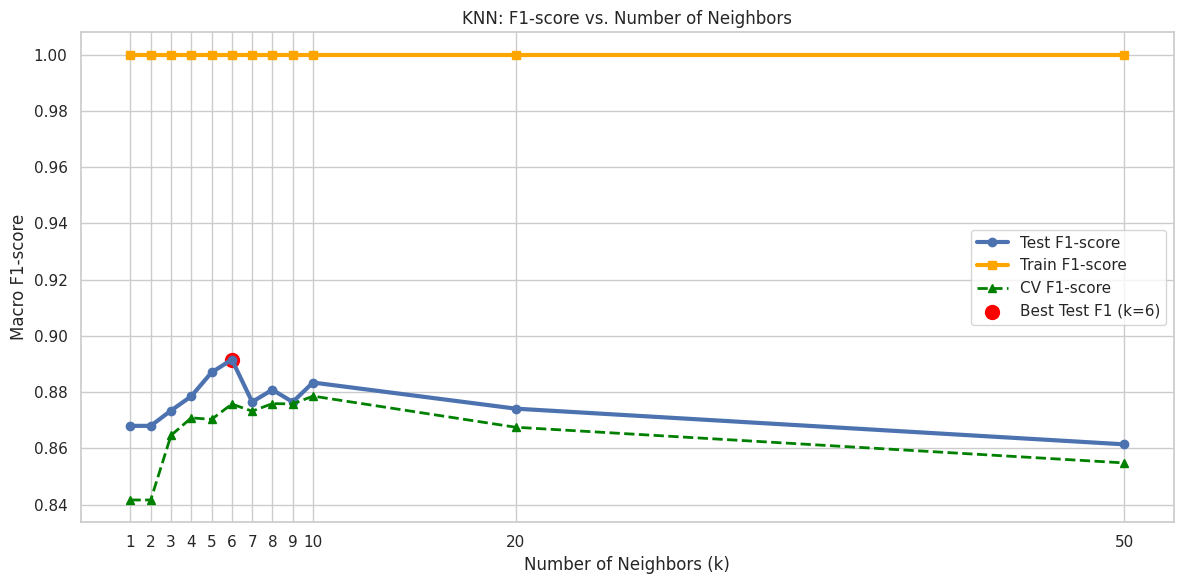

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the neighbor values to test
neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]

# Store F1-scores
f1_scores_test = []
f1_scores_train = []
cv_scores = []

print("Evaluating KNN classifiers with different neighbor settings...\n")

for k in neighbors_list:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X_train, y_train)

    # Predict and score on training set
    y_train_pred = model.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    f1_scores_train.append(f1_train)

    # Predict and score on test set
    y_test_pred = model.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    f1_scores_test.append(f1_test)

    # Optional: Cross-validation on training data
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro').mean()
    cv_scores.append(cv_f1)

    print(f"k={k:<2} | Train F1: {f1_train:.2f} | Test F1: {f1_test:.2f} | CV F1: {cv_f1:.2f}")

# Plot the F1-scores
plt.figure(figsize=(12, 6))
plt.plot(neighbors_list, f1_scores_test, marker='o', label='Test F1-score', linewidth=3)
plt.plot(neighbors_list, f1_scores_train, marker='s', label='Train F1-score', linewidth=3, color='orange')
plt.plot(neighbors_list, cv_scores, marker='^', label='CV F1-score', linestyle='--', linewidth=2, color='green')

# Annotate best test F1
best_k_idx = f1_scores_test.index(max(f1_scores_test))
best_k = neighbors_list[best_k_idx]
plt.scatter(best_k, f1_scores_test[best_k_idx], color='red', s=100, label=f'Best Test F1 (k={best_k})')

plt.title('KNN: F1-score vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Macro F1-score')
plt.xticks(neighbors_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The best k is 6.

# 5 Points: Multiclass Decision Trees (with F1-score above 2.5/number_of_classes)


Training Decision Tree with criterion='gini' and max_depth=10...
Train F1-score: 0.96 | Test F1-score: 0.90

Training Decision Tree with criterion='entropy' and max_depth=10...
Train F1-score: 0.97 | Test F1-score: 0.89

Tuning tree depth and evaluating F1-scores...
Depth=1  | Train F1: 0.40 | Test F1: 0.40
Depth=2  | Train F1: 0.63 | Test F1: 0.62
Depth=3  | Train F1: 0.82 | Test F1: 0.82
Depth=4  | Train F1: 0.87 | Test F1: 0.86
Depth=5  | Train F1: 0.88 | Test F1: 0.85
Depth=6  | Train F1: 0.90 | Test F1: 0.88
Depth=7  | Train F1: 0.92 | Test F1: 0.88
Depth=8  | Train F1: 0.93 | Test F1: 0.90
Depth=9  | Train F1: 0.95 | Test F1: 0.89
Depth=10 | Train F1: 0.96 | Test F1: 0.90
Depth=20 | Train F1: 1.00 | Test F1: 0.89


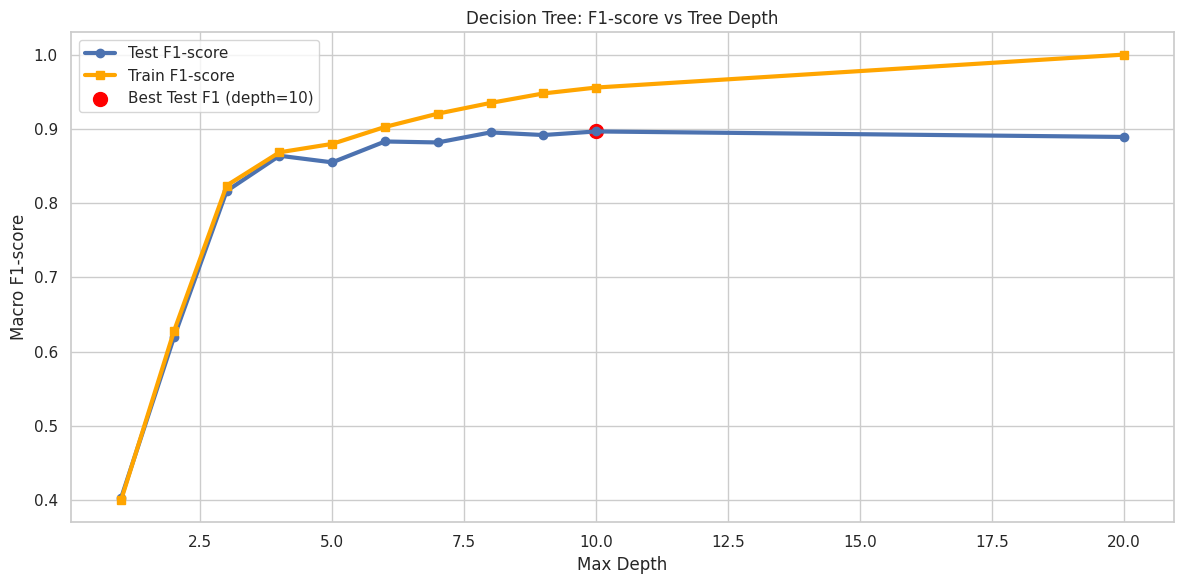


Visualizing a small tree (depth=2, criterion='entropy'):


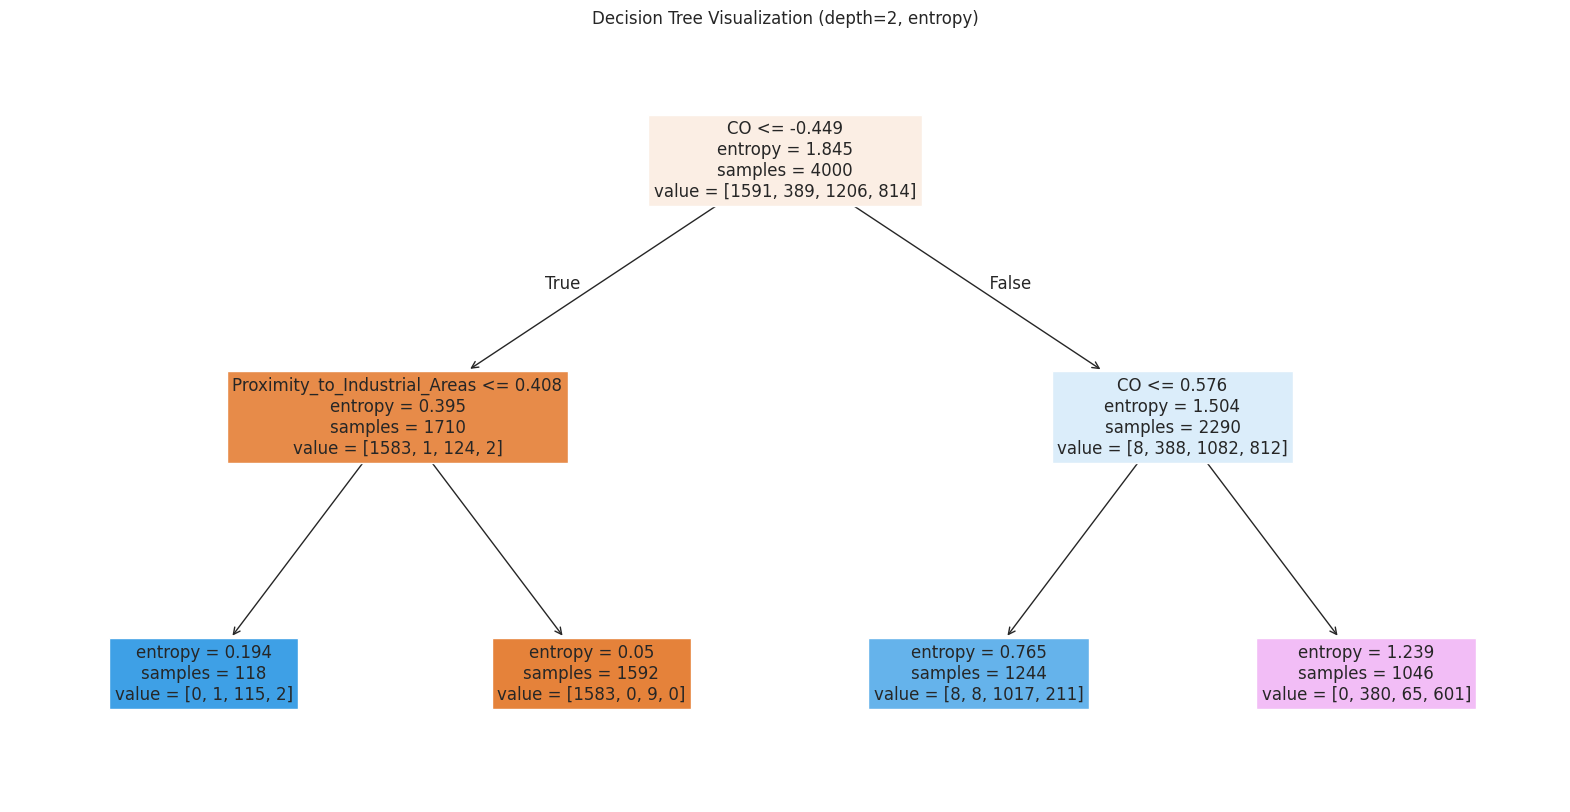

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Evaluate Gini vs Entropy criteria with fixed max_depth
for criterion in ['gini', 'entropy']:
    print(f"\nTraining Decision Tree with criterion='{criterion}' and max_depth=10...")
    model = DecisionTreeClassifier(criterion=criterion, max_depth=10)
    model.fit(X_train, y_train)

    # Train and test F1-scores
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    f1_train = f1_score(y_train, train_pred, average='macro')
    f1_test = f1_score(y_test, test_pred, average='macro')

    print(f"Train F1-score: {f1_train:.2f} | Test F1-score: {f1_test:.2f}")

# Range of tree depths to test
depths_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
scores_train = []
scores_test = []

print("\nTuning tree depth and evaluating F1-scores...")
for depth in depths_list:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    f1_train = f1_score(y_train, train_pred, average='macro')
    f1_test = f1_score(y_test, test_pred, average='macro')

    scores_train.append(f1_train)
    scores_test.append(f1_test)

    print(f"Depth={depth:<2} | Train F1: {f1_train:.2f} | Test F1: {f1_test:.2f}")

# Plot F1-score vs tree depth
plt.figure(figsize=(12, 6))
plt.plot(depths_list, scores_test, marker='o', linewidth=3, label='Test F1-score')
plt.plot(depths_list, scores_train, marker='s', linewidth=3, label='Train F1-score', color='orange')

# Annotate best depth
best_idx = scores_test.index(max(scores_test))
best_depth = depths_list[best_idx]
plt.scatter(best_depth, scores_test[best_idx], color='red', s=100, label=f'Best Test F1 (depth={best_depth})')

plt.title('Decision Tree: F1-score vs Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Macro F1-score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize a small tree for interpretability
print(f"\nVisualizing a small tree (depth=2, criterion='entropy'):")
viz_model = DecisionTreeClassifier(max_features=50, max_depth=2, criterion='entropy')
viz_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(viz_model, feature_names=df.columns, filled=True, fontsize=12)
plt.title("Decision Tree Visualization (depth=2, entropy)")
plt.show()


# 15 Points: Boosting Techniques (with F1-score above 2.5/number_of_classes)
* 5 Points: XGBoost
* 5 Points: LightGBM
* 5 Points: Adaboost or Catboost

# 5 Points: Grid search to tune one of the boosting methods above

In [52]:
pip install catboost

🧠 XGBoost Evaluation
------------------------------
n_estimators=15 | Train F1: 0.98 | Test F1: 0.92
n_estimators=20 | Train F1: 0.98 | Test F1: 0.92
n_estimators=40 | Train F1: 1.00 | Test F1: 0.92
n_estimators=100 | Train F1: 1.00 | Test F1: 0.93
n_estimators=200 | Train F1: 1.00 | Test F1: 0.93


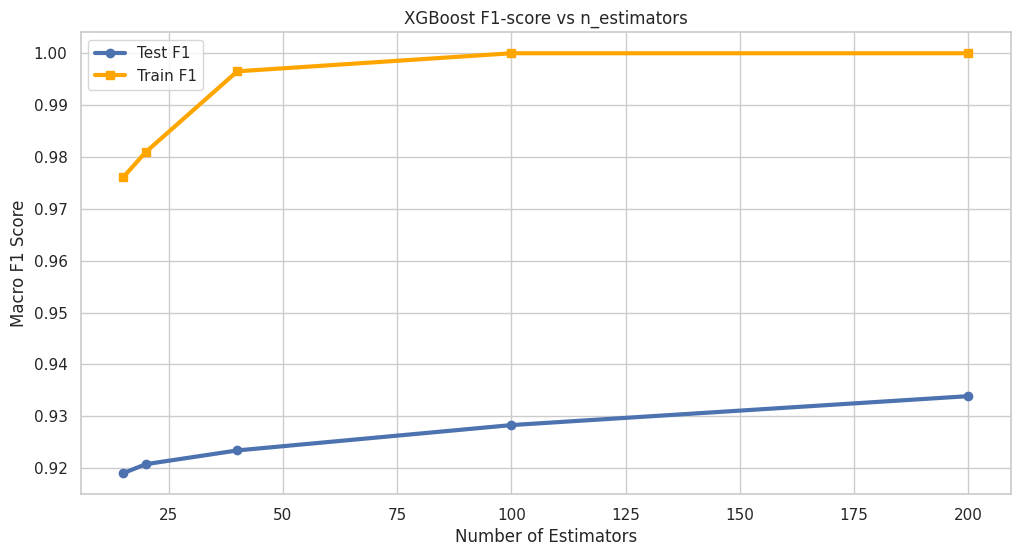

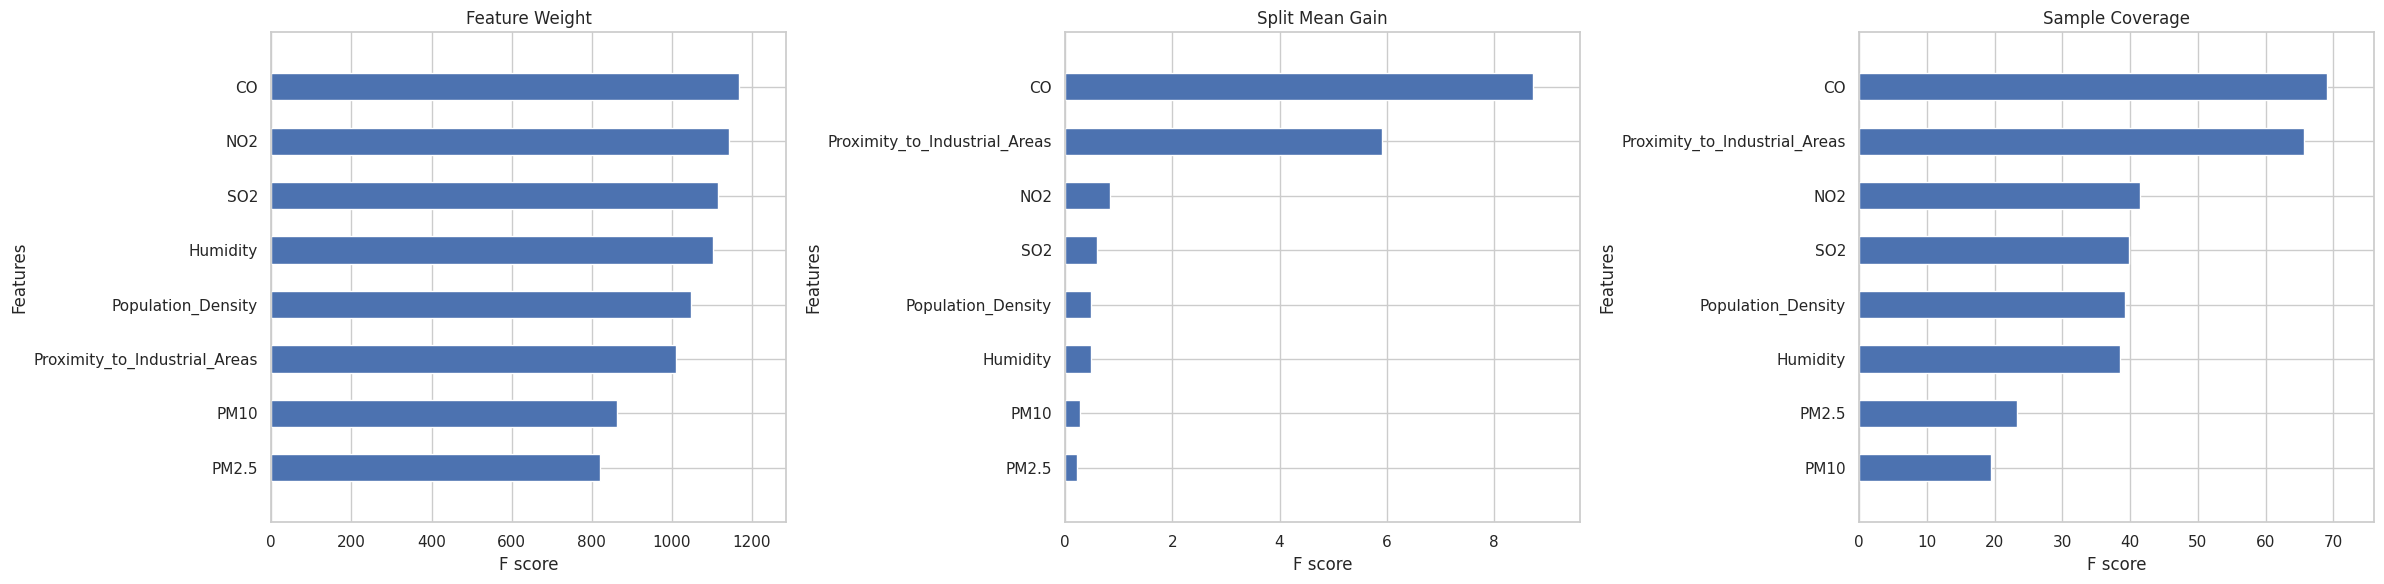

<Figure size 2000x2000 with 0 Axes>

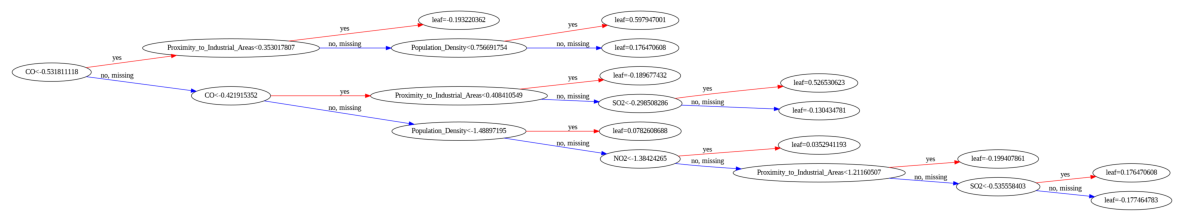

Fitting 3 folds for each of 30 candidates, totalling 90 fits

🔍 XGBoost RandomizedSearchCV Best Macro F1: 0.93
Best Params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.6, 'eta': 0.1, 'colsample_bytree': 0.8}

🌱 LightGBM Evaluation
------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1936
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 8
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Macro F1-score: 0.92


<Figure size 1400x600 with 0 Axes>

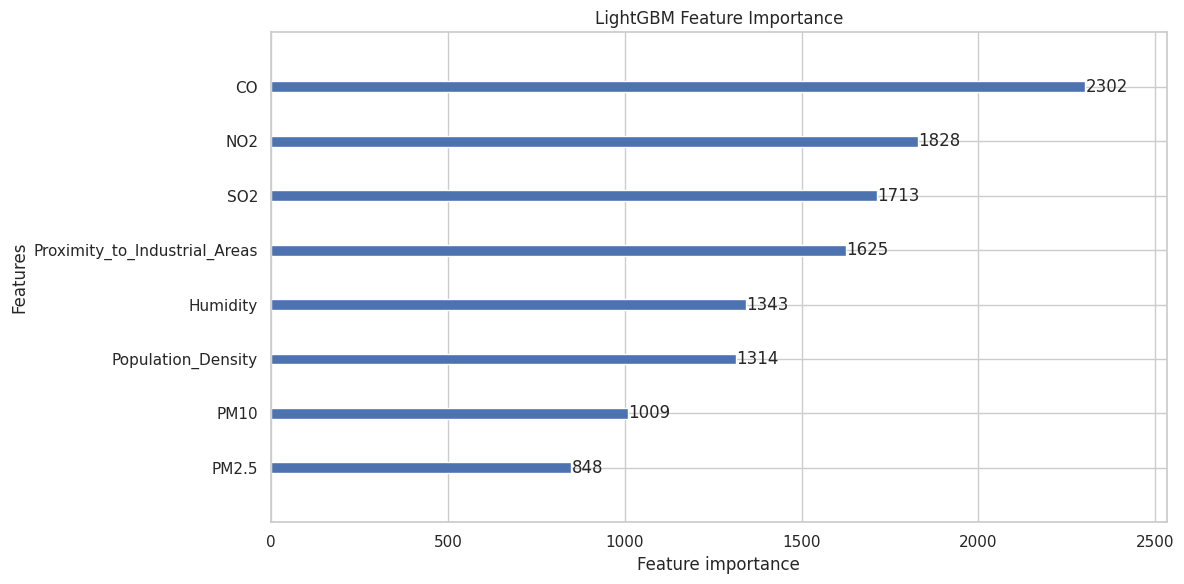

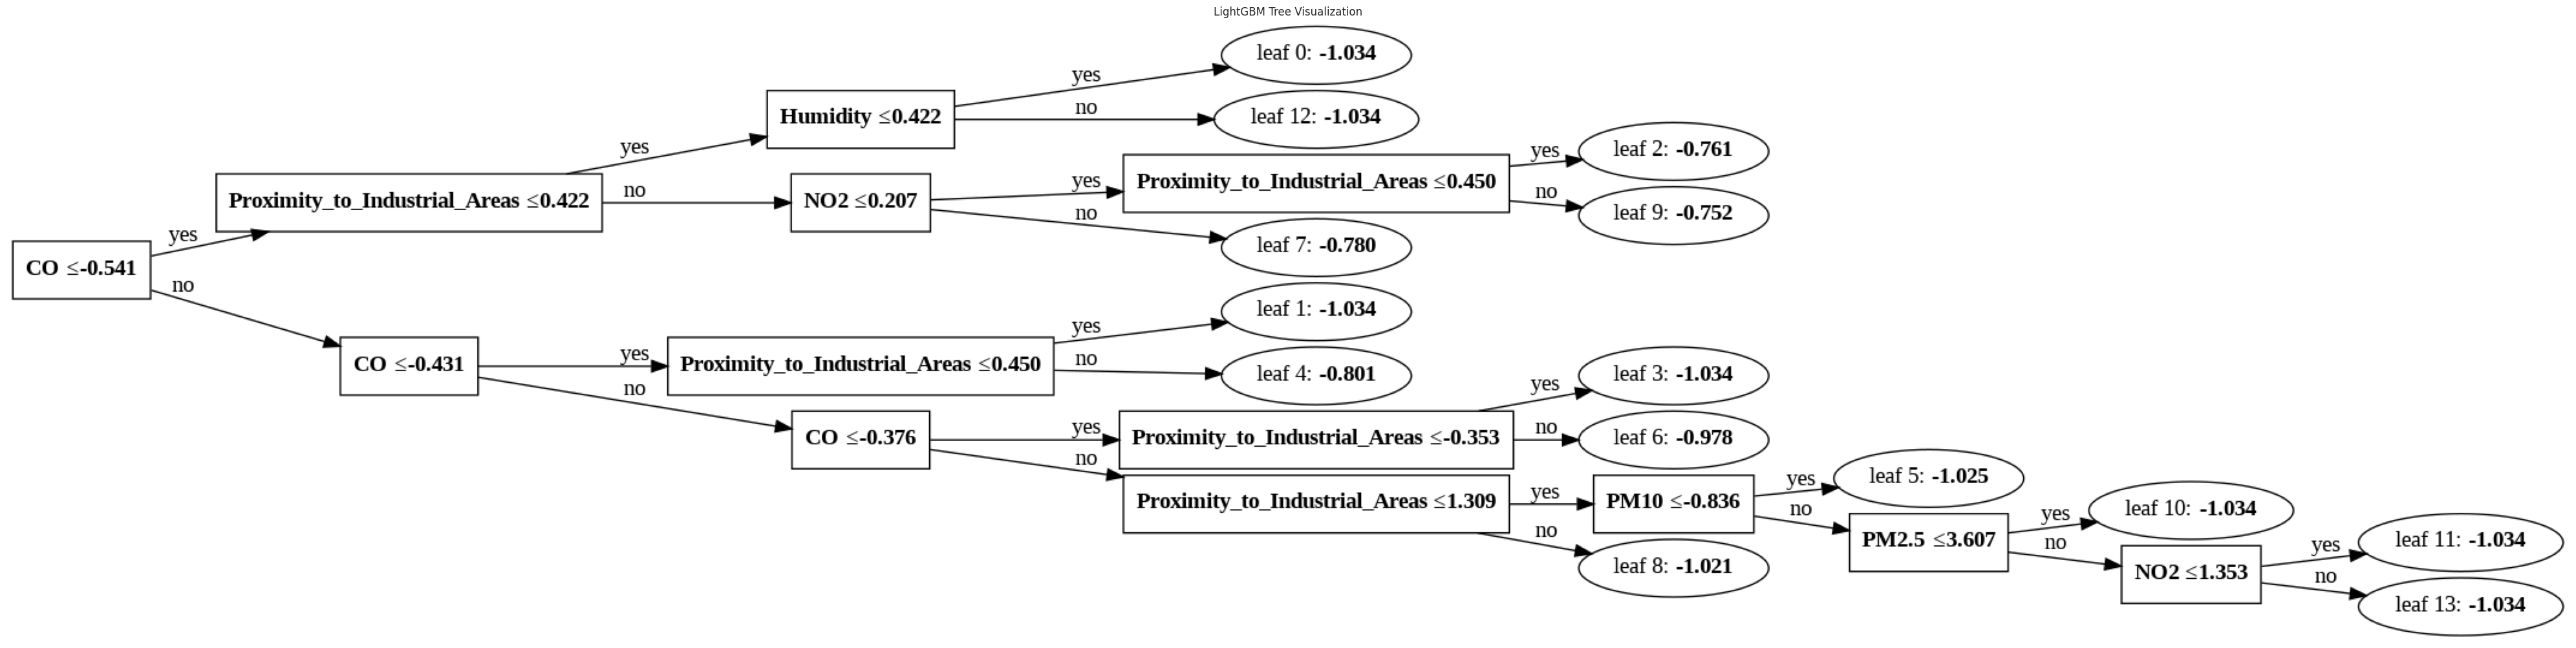

<Figure size 1000x1000 with 0 Axes>

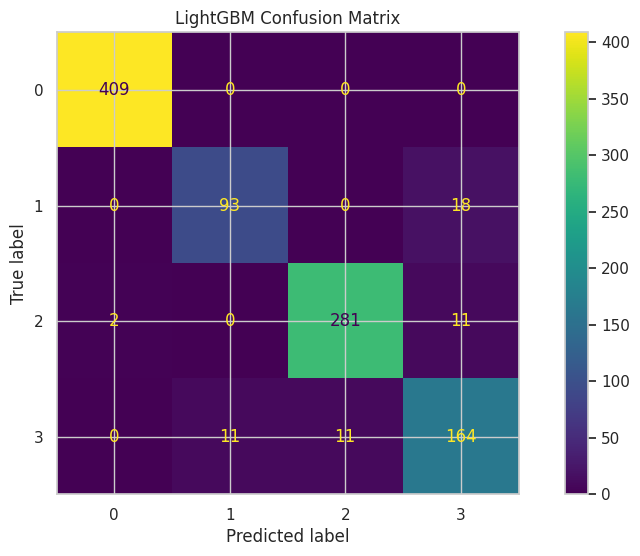


🐱 CatBoost Evaluation
------------------------------
Macro F1-score: 0.93


In [53]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, plot_importance, plot_tree
import lightgbm as lgb
from lightgbm import plot_importance as lgbm_plot_importance, plot_tree as lgbm_plot_tree
from catboost import CatBoostClassifier
import warnings

# Suppress unnecessary warnings
warnings.filterwarnings("ignore")

# Label encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### ------------------ XGBoost ------------------
print("🧠 XGBoost Evaluation\n" + "-"*30)
xgb_scores_train = []
xgb_scores_test = []
n_estimators_list = [15, 20, 40, 100, 200]

for n in n_estimators_list:
    xgb_model = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train_encoded)

    train_pred = xgb_model.predict(X_train)
    test_pred = xgb_model.predict(X_test)

    f1_train = f1_score(y_train_encoded, train_pred, average='macro')
    f1_test = f1_score(y_test_encoded, test_pred, average='macro')

    xgb_scores_train.append(f1_train)
    xgb_scores_test.append(f1_test)

    print(f"n_estimators={n} | Train F1: {f1_train:.2f} | Test F1: {f1_test:.2f}")

# Plot performance vs. n_estimators
plt.figure(figsize=(12,6))
plt.plot(n_estimators_list, xgb_scores_test, marker='o', lw=3, label='Test F1')
plt.plot(n_estimators_list, xgb_scores_train, marker='s', lw=3, label='Train F1', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('Macro F1 Score')
plt.title('XGBoost F1-score vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
importance_types = ['weight', 'gain', 'cover']
titles = ['Feature Weight', 'Split Mean Gain', 'Sample Coverage']

for i, imp in enumerate(importance_types):
    plot_importance(xgb_model, importance_type=imp, ax=ax[i], title=titles[i], height=0.5, show_values=False)

plt.tight_layout()
plt.show()

# Plot tree
plt.figure(figsize=(20, 20))
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.tight_layout()
plt.show()

# RandomizedSearchCV for XGBoost
param_grid = {
    "eta": [0.1, 0.01],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 5, 10],
    "n_estimators": [50, 100, 200],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3, 0.6],
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_grid,
    n_iter=30,
    n_jobs=-1,
    refit="accuracy",
    cv=3,
    verbose=1
)

best_xgb = xgb_random.fit(X_train, y_train_encoded)
xgb_pred = best_xgb.predict(X_test)
print("\n🔍 XGBoost RandomizedSearchCV Best Macro F1: %.2f" % f1_score(y_test_encoded, xgb_pred, average='macro'))
print("Best Params:", best_xgb.best_params_)

### ------------------ LightGBM ------------------
print("\n🌱 LightGBM Evaluation\n" + "-"*30)
lgb_model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=10)
lgb_model.fit(X_train, y_train_encoded)

lgb_pred = lgb_model.predict(X_test)
print('Macro F1-score: %.2f' % f1_score(y_test_encoded, lgb_pred, average='macro'))

# Feature importance
plt.figure(figsize=(14, 6))
lgbm_plot_importance(lgb_model)
plt.title("LightGBM Feature Importance")
plt.tight_layout()
plt.show()

# Visualize a tree (tree_index=0 for first tree)
plt.figure(figsize=(40, 20))
lgbm_plot_tree(lgb_model, tree_index=0, ax=plt.gca())
plt.title("LightGBM Tree Visualization")
plt.tight_layout()
plt.show()

# Confusion matrix
plt.figure(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(lgb_model, X_test, y_test_encoded)
plt.title("LightGBM Confusion Matrix")
plt.show()

### ------------------ CatBoost ------------------
print("\n🐱 CatBoost Evaluation\n" + "-"*30)
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.3,
    depth=5,
    verbose=0
)

cat_model.fit(X_train, y_train_encoded)
cat_pred = cat_model.predict(X_test)
print('Macro F1-score: %.2f' % f1_score(y_test_encoded, cat_pred, average='macro'))

# 10 Points: Please explain how KNN and decision trees can be extended to multi-label classification problems.

## K-Nearest Neighbors (KNN) for Multi-Label Classification

### Overview and Methodology

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based learning method widely used for classification tasks. In the context of **multi-label classification**, where each instance can be associated with multiple labels simultaneously, KNN can be adapted as follows:

1. **Neighbor Selection**  
   For a given test instance, identify the **k nearest neighbors** from the training data using a suitable distance metric, such as Euclidean, Manhattan, or cosine similarity.

2. **Label Aggregation**  
   Each of the k neighbors may possess multiple labels. Collect the full set of labels across all k neighbors.

3. **Label Frequency Counting**  
   For each possible label in the label space, compute the number of neighbors that contain the label. This results in a frequency count for each label.

4. **Thresholding for Final Prediction**  
   Apply a **decision threshold** (commonly set to 0.5) to determine whether a label should be included in the final prediction. For instance, if a label appears in more than 50% of the k neighbors, it is assigned to the test instance. The threshold can be adjusted based on application-specific precision-recall trade-offs.

This approach is simple yet effective and particularly advantageous when the label dependencies are not explicitly modeled but are implicitly captured through the neighborhood structure.

---

## Decision Trees for Multi-Label Classification

Decision trees can be adapted for multi-label learning through different strategies. Two common approaches are detailed below:

### Method 1: Binary Relevance (BR) Approach

- **Independent Tree Construction**  
  Construct a separate binary decision tree for **each individual label**. Each tree is trained to distinguish between the presence and absence of a specific label.

- **Label-Wise Prediction**  
  During inference, each tree independently predicts whether its corresponding label should be assigned to the test instance.

- **Output Aggregation**  
  The outputs from all trees are combined to form the final set of predicted labels. This approach is straightforward and allows the reuse of existing binary classification algorithms.

- **Limitation**  
  This method **ignores inter-label correlations**, which may reduce performance in scenarios where labels are not mutually independent.

### Method 2: Adapted Multi-Label Decision Tree

- **Joint Label Modeling**  
  Modify the decision tree algorithm to handle **multiple labels simultaneously** rather than training separate models.

- **Multi-Label Impurity Measures**  
  Employ specialized impurity metrics designed for multi-label scenarios, such as **average entropy**, **label-wise Gini index**, or **subset accuracy-based criteria**, to guide the tree-splitting process.

- **Enhanced Label Interaction Modeling**  
  This approach allows the tree to naturally capture correlations between labels, potentially leading to better predictive performance in datasets where label dependencies are significant.

- **Complexity Considerations**  
  While this method is more expressive, it may involve increased computational complexity and require more careful tuning.
